#<center> Cyber Risk Detection Using Machine Learning Algorithms

$\textbf{Abstract:}$

In the last decade, the usage of technology has grown rapidly. As technology becomes part of our daily use, cybercrime incidents such as identity theft, hacking and loss of personal information due to visiting websites has also taken place. Different organizations around the world fall prey to sophisticated cyber attacks. This project uses different Machine Learning algorithms such as the Naive Bayes, $K$-means and the Support Vector Machine (SVM) to detect different cyber risks such as theft, hacking/IT incidents and loss. We compare these algorithms to see which one detects the cyber risk better and also point out which cyber risk is encountered the most by companies. In doing this, we found that the dataset was imbalanced, so we resampled the dataset by using the SMOTE, Random Oversampling and SMOTE+TOMEK Links techniques. The evaluation metrics used to evaluate the efficiency of the algorithms is Precision, Recall and $F1$-score. Experimental results show that theft is the cyber breach that most organizations are currently facing and the $K$-means algorithm is better at detecting cyber risk.

The code below is used in achiving the results that we got.

References for some of the codes used:

https://medium.com/@dilekamadushan/introduction-to-k-means-clustering-7c0ebc997e00

https://medium.com/x8-the-ai-community/a-simple-introduction-to-naive-bayes-23538a0395a

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

In [ ]:
# Import the necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import ast #to convert string into dictionary

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn import svm

# Imblearn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Reading in the data
dataframe = pd.read_csv("/content/drive/My Drive/data/Cyber Security Breaches.csv", header=0, sep=',')
data = dataframe

In [ ]:
#Viewing the data
data.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


#<center> **Preprocessing:**

In [ ]:
# Dropping Unecessary Columns
data.drop(columns='Unnamed: 0', inplace=True, axis=1)
data.drop(columns='Number', inplace=True, axis=1)
data.drop(columns='Business_Associate_Involved', inplace=True, axis=1)
data.drop(columns='breach_end', inplace=True, axis=1)
data.head()

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,year
0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,2009
2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,2009
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,2009
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,2009


From the Type of Breach column, I want to group every repeatitive type of breach into Other so that I can only be left with only four types of breaches.

In [ ]:
# This code prints out the total count of every word in the Type of Breach column, 
# how many times the word appears in different rows
StateType = data['Type_of_Breach'].value_counts()
print(StateType)

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Loss, Improper Disposal                                         3
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Loss, Othe

In [ ]:
#creating a list to store the type of breach, 
# by this way I can remove the ones that I do not want to rename
list(data["Type_of_Breach"].unique()) 

['Theft',
 'Loss',
 'Other',
 'Hacking/IT Incident',
 'Unauthorized Access/Disclosure ',
 'Theft, Loss',
 'Improper Disposal',
 'Loss, Improper Disposal',
 'Theft, Other',
 'Loss, Other',
 'Unauthorized Access/Disclosure',
 'Unauthorized Access/Disclosure, Hacking/IT Incident',
 'Theft, Loss, Improper Disposal',
 'Theft, Unauthorized Access/Disclosure, Hacking/IT Incident',
 'Unknown',
 'Theft, Unauthorized Access/Disclosure',
 'Unauthorized Access/Disclosure, Other',
 'Hacking/IT Incident, Other',
 'Unknown, Other',
 'Loss, Unknown',
 'Loss, Unauthorized Access/Disclosure, Unknown',
 'Theft, Loss, Unauthorized Access/Disclosure, Unknown',
 'Unauthorized Access/Disclosure, Hacking/IT Incident, Other',
 'Theft, Hacking/IT Incident',
 'Theft, Loss, Other',
 'Theft, Unauthorized Access/Disclosure, Other',
 'Theft, Improper Disposal, Unauthorized Access/Disclosure',
 'Improper Disposal, Unauthorized Access/Disclosure',
 'Loss, Unauthorized Access/Disclosure']

In [ ]:
#remove_a removes the ones that I do not want to rename
remove_a=['Unauthorized Access/Disclosure ',
  'Theft, Loss',
 'Improper Disposal',
 'Loss, Improper Disposal',
 'Theft, Other',
 'Loss, Other',
 'Unauthorized Access/Disclosure',
 'Unauthorized Access/Disclosure, Hacking/IT Incident',
 'Theft, Loss, Improper Disposal',
 'Theft, Unauthorized Access/Disclosure, Hacking/IT Incident',
 'Unknown',
 'Theft, Unauthorized Access/Disclosure',
 'Unauthorized Access/Disclosure, Other',
 'Hacking/IT Incident, Other',
 'Unknown, Other',
 'Loss, Unknown',
 'Loss, Unauthorized Access/Disclosure, Unknown',
 'Theft, Loss, Unauthorized Access/Disclosure, Unknown',
 'Unauthorized Access/Disclosure, Hacking/IT Incident, Other',
 'Theft, Hacking/IT Incident',
 'Theft, Loss, Other',
 'Theft, Unauthorized Access/Disclosure, Other',
 'Theft, Improper Disposal, Unauthorized Access/Disclosure',
 'Improper Disposal, Unauthorized Access/Disclosure',
 'Loss, Unauthorized Access/Disclosure']

In [ ]:
#a for loop for renaming
for row in range(1,len(data)):
  breach = data.at[row,"Type_of_Breach"]
  if breach not in remove_a:
    pass
  else:
    data.at[row,"Type_of_Breach"]="Other"

In [ ]:
# The new count of the type of breach column
BreachType = data['Type_of_Breach'].value_counts()
print(BreachType)

Theft                  516
Other                  379
Loss                    85
Hacking/IT Incident     75
Name: Type_of_Breach, dtype: int64


We do the same for the Location of breached information column

In [ ]:
list(data["Location_of_Breached_Information"].unique()) 

['Paper',
 'Network Server',
 'Other Portable Electronic Device, Other',
 'Laptop',
 'Desktop Computer',
 'Other',
 'Desktop Computer, Network Server, Electronic Medical Record',
 'Other Portable Electronic Device',
 'Laptop, Desktop Computer',
 'E-mail',
 'Other Portable Electronic Device, Other, Electronic Medical Record',
 'Other, Paper',
 'E-mail, Other Portable Electronic Device',
 'Laptop, Desktop Computer, Network Server, E-mail',
 'Desktop Computer, Paper',
 'Desktop Computer, Other',
 'Laptop, Desktop Computer, Other Portable Electronic Device, Other',
 'Electronic Medical Record',
 'Laptop, Paper',
 'Laptop, Network Server',
 'Desktop Computer, Network Server',
 'Network Server, E-mail',
 'Other, Electronic Medical Record',
 'Desktop Computer, Other Portable Electronic Device, Other',
 'Desktop Computer, Network Server, Other Portable Electronic Device, Other',
 'Laptop, Desktop Computer, Network Server, E-mail, Other Portable Electronic Device, Other, Electronic Medical Reco

In [ ]:
remove_b=['Other','Other Portable Electronic Device, Other',
          'Desktop Computer, Network Server, Electronic Medical Record',
 'Other Portable Electronic Device',
 'Laptop, Desktop Computer',
 'E-mail',
 'Other Portable Electronic Device, Other, Electronic Medical Record',
 'Other, Paper',
 'E-mail, Other Portable Electronic Device',
 'Laptop, Desktop Computer, Network Server, E-mail',
 'Desktop Computer, Paper',
 'Desktop Computer, Other',
 'Laptop, Desktop Computer, Other Portable Electronic Device, Other',
 'Electronic Medical Record',
 'Laptop, Paper',
 'Laptop, Network Server',
 'Desktop Computer, Network Server',
 'Network Server, E-mail',
 'Other, Electronic Medical Record',
 'Desktop Computer, Other Portable Electronic Device, Other',
 'Desktop Computer, Network Server, Other Portable Electronic Device, Other',
 'Laptop, Desktop Computer, Network Server, E-mail, Other Portable Electronic Device, Other, Electronic Medical Record',
 'Laptop, Other Portable Electronic Device, Paper',
 'Laptop, Desktop Computer, Network Server, E-mail, Other Portable Electronic Device, Other, Electronic Medical Record, Paper',
 'Laptop, Electronic Medical Record',
 'Electronic Medical Record, Paper',
 'Laptop, Other Portable Electronic Device',
 'Desktop Computer, Electronic Medical Record',
 'Desktop Computer, Other Portable Electronic Device',
 'E-mail, Other',
 'Network Server, Electronic Medical Record',
 'Network Server, Other',
 'Desktop Computer, Network Server, E-mail, Electronic Medical Record, Paper',
 'Desktop Computer, E-mail',
 'Laptop, Network Server, E-mail',
 'Laptop, E-mail, Other Portable Electronic Device',
 'Laptop, Desktop Computer, Other Portable Electronic Device']

In [ ]:
for row in range(1,len(data)):
  location = data.at[row,"Location_of_Breached_Information"]
  if location not in remove_b:
    pass
  else:
    data.at[row,"Location_of_Breached_Information"]="Other Locations"

In [ ]:
data['Location_of_Breached_Information'].value_counts()

Other Locations     391
Paper               227
Laptop              217
Desktop Computer    113
Network Server      107
Name: Location_of_Breached_Information, dtype: int64

In [ ]:
# Changes the name of the dataset from data to df
df = data

In [ ]:
# We need to check those columns with empty rows and put values into the rows so we shouldn't have empty columns
df[df.isnull().any(axis=1)]#cleans up the null values

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,year
2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,Other Locations,2014-01-23,NaN,2009-10-12,2009
10,The Children's Hospital of Philadelphia,PA,943,10/20/2009,Theft,Laptop,2014-01-23,NaN,2009-10-20,2009
13,Kern Medical Center,CA,596,10/31/2009,Theft,Other Locations,2014-01-23,NaN,2009-10-31,2009
14,"Keith W. Mann, DDS, PLLC",NC,2000,12/8/2009,Hacking/IT Incident,Other Locations,2014-01-23,NaN,2009-12-08,2009
15,Detroit Department of Health and Wellness Prom...,MI,10000,10/22/2009,Theft,Other Locations,2014-01-23,NaN,2009-10-22,2009
...,...,...,...,...,...,...,...,...,...,...
1050,Puerto Rico Health Insurance,PR,28413,9/20/2013,Theft,Other Locations,2014-06-27,NaN,2013-09-20,2013
1051,"Hospitalists of Brandon, LLC",FL,1831,2/11/2014,Hacking/IT Incident,Other Locations,2014-06-27,NaN,2014-02-11,2014
1052,Santa Rosa Memorial Hospital,CA,33702,6/2/2014,Other,Other Locations,2014-06-27,NaN,2014-06-02,2014
1053,Group Health Plan of Hurley Medical Center,MI,2289,5/13/2014,Other,Other Locations,2014-06-27,NaN,2014-05-13,2014


In [ ]:
# From the above code, we saw that the Summary column is the one that contains empty rows,
# This code inserts values into the empty rows
df = df.fillna({"Summary": "No Summary"})
df.head()

,Name_of_Covered_Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,year
0,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009
1,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,2009
2,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,Other Locations,2014-01-23,No Summary,2009-10-12,2009
3,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,2009
4,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,2009


In [ ]:
# Since the data types of the table was object
# the following code changes the columns that I will be using to build a model into categorical data
# The Individuals Affected column already contains integer values but are in object type, here we jsut conver them into integers
df["Type_of_Breach"] = df["Type_of_Breach"].astype('category')
df["Individuals_Affected"] = df["Individuals_Affected"].astype('category')
df["Location of Breach"] = df['Location_of_Breached_Information'].astype(str)
df["Summary"] = df['Summary'].astype(str)
df.dtypes

Name_of_Covered_Entity                object
State                                 object
Individuals_Affected                category
Date_of_Breach                        object
Type_of_Breach                      category
Location_of_Breached_Information      object
Date_Posted_or_Updated                object
Summary                               object
breach_start                          object
year                                   int64
Location of Breach                    object
dtype: object

In [ ]:
# We cannot work with categorical data, we need to change the words in the columns into numerical values
# The following code encodes the words into numbers(Integer values)
df["Type_of_Breach"] = df["Type_of_Breach"].cat.codes
df["Type_of_Breach"]

0       3
1       3
2       3
3       1
4       3
       ..
1050    3
1051    0
1052    2
1053    2
1054    3
Name: Type_of_Breach, Length: 1055, dtype: int8

In [ ]:
type_labels = list(df['Location_of_Breached_Information'].unique())
print(type_labels)

['Paper', 'Network Server', 'Other Locations', 'Laptop', 'Desktop Computer']


In [ ]:
type_labels1 = list(df['Type_of_Breach'].unique())
print(type_labels1)

[3, 1, 2, 0]


#<center> **Graphs**

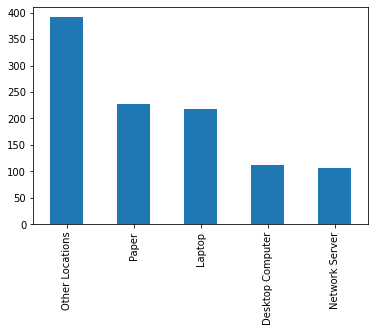

In [ ]:
# Drawing a graph for the locations where the cyber breaches happened
df['Location_of_Breached_Information'].value_counts().plot(kind = 'bar')
plt.show()

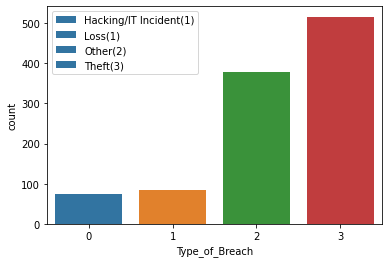

In [ ]:
# Drawing a graph for the types of breaches
sns.countplot(x='Type_of_Breach',data=df,label='Hacking/IT Incident(1)')
sns.countplot(x='Type_of_Breach',data=df,label='Loss(1)')
sns.countplot(x='Type_of_Breach',data=df,label='Other(2)')
sns.countplot(x='Type_of_Breach',data=df,label='Theft(3)')
plt.title('')
plt.legend()
plt.show()

#<center> **TFIDF**

## **Computing the Term Frequency (TF)**

In [ ]:
# Concating all the columns that we want to use as our features
combine = df['Location_of_Breached_Information']+df['Summary']+df['Name_of_Covered_Entity']+df['State']

In [ ]:
# In order to start using the TfidfTransformer, we have to create a CountVectorizer to count the number of words (the Term Frequency)
# This helps us to limit our vpcabulary size, apply stopwords and so on
# the code below instantiate CountVectorizer() 

#instantiate CountVectorizer() 
cv=CountVectorizer() 

# this steps generates the word counts 
word_count_vector=cv.fit_transform(combine)

## **Computing the Inverse Document Frequency (IDF) values**

Now we are going to compute the IDF values by calling tfidf_transformer.fit(word_count_vector) on the word counts we computed earlier.

In [ ]:
# Now we will compute the IDF values 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
# this steps generates the IDF 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

## **Computing the TF-IDF score**

In [ ]:
# count matrix 
count_vector=cv.transform(combine) 
 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

#printing the shape
tf_idf_vector.shape

(1055, 3560)

In [ ]:
# Defing the X and Y
X = tf_idf_vector
Y = df['Type_of_Breach']

In [ ]:
# Spliting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X_train , X_val, y_train , y_val = train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
# printing the shapes of the dataset
print('X ',X.shape)
print('Y ',Y.shape)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',y_train.shape)
print('Y_test',y_test.shape)
print('X_val',X_val.shape)
print('Y_val',y_val.shape)

X  (1055, 3560)
Y  (1055,)
X_train (516, 3560)
X_test (317, 3560)
Y_train (516,)
Y_test (317,)
X_val (222, 3560)
Y_val (222,)


#<center> **Balancing the Data:**

## Balancing with SMOTE:



In [ ]:
# Defing the SMOTE resampling technique
oversample = SMOTE(sampling_strategy='auto', # resamples all the classes but not the majority classes
                   random_state=None, # controls randomisation of the algorithm
                   k_neighbors=5, # number of nearest neighbours to used to construct synthetic samples(5 is the default value)
                   m_neighbors='deprecated', # number of nearest neighbours to use to determine if a minority sample is in danger
                   out_step='svm', # it is the step size when extrapolating
                   kind='borderline1', # the type of the SMOTE algorithm to use 
                   svm_estimator='svm', 
                   n_jobs=1, # the number of threads to open if possible(1 is the default value)
                   ratio=None)
X_train_smote, Y_train_smote = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# printing the new shapes
print("The X train shape with SOMOTE is:",X_train_smote.shape)
print("The Y train shape SOMOTE is:",Y_train_smote.shape)

The X train shape with SOMOTE is: (1016, 3560)
The Y train shape SOMOTE is: (1016,)


## Balancing with RandomOverSampling:

Random Over Sampling:

In [ ]:
# defining the random oversampling technique
oversample1 = RandomOverSampler(sampling_strategy='not minority',#resample all classes but the minority class
                                return_indices=False, # whether or not to return the indices of the samples randomly selected in the corresponding classes.
                                random_state=None, # controls randomisation of the algorithm
                                ratio=None) 


In [ ]:
X_trainRand, Y_trainRand = oversample1.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# printing the new shapes
print("The X train shape with RandomOverSampling is:",X_trainRand.shape)
print("The Y train shape RandomOverSampling is:",Y_trainRand.shape)

The X train shape with RandomOverSampling is: (797, 3560)
The Y train shape RandomOverSampling is: (797,)


## Balancing with SMOTE and TOMEK:

SMOTE and TOMEK


In [ ]:
# defining the SMOTE+TOMEK Links technique
smt = SMOTETomek(sampling_strategy='auto', #resample all classes but the majority class
                 random_state=None, # controls randomisation of the algorithm
                 smote=SMOTE(), 
                 tomek=TomekLinks(sampling_strategy='all'), 
                 ratio=None)
X_train_SMT, Y_train_SMT = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# printing the new shapes
print("The X train shape with SOMOTE and TOMEK is:",X_train_SMT.shape)
print("The Y train shape SOMOTE and TOMEK is:",Y_train_SMT.shape)


The X train shape with SOMOTE and TOMEK is: (1002, 3560)
The Y train shape SOMOTE and TOMEK is: (1002,)


# **Naive Bayes:**

In [ ]:
# Defing the multinomial Naive Bayes model
multi_naive = MultinomialNB()

### Naive Bayes without balanced

In [ ]:
# Train the model using the training sets
multi_naive.fit(X_train, y_train)

#Predict the response for test dataset
pred = multi_naive.predict(X_test)

#Printing the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        28
           2       0.44      0.34      0.39       116
           3       0.55      0.83      0.66       150

    accuracy                           0.52       317
   macro avg       0.25      0.29      0.26       317
weighted avg       0.42      0.52      0.45       317



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


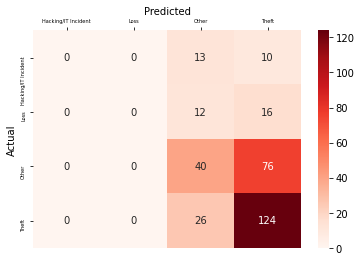

In [ ]:
# Plotting the confusion matrix for Naive Bayes 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, pred))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### Naive Bayes with SMOTE

In [ ]:
# Train the model using the SMOTE training sets
multi_naive.fit(X_train_smote, Y_train_smote)

#Predict the response for test dataset
pred1 = multi_naive.predict(X_test)

#Printing the classification report for SMOTE
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.28      0.61      0.38        23
           1       0.13      0.39      0.20        28
           2       0.55      0.44      0.49       116
           3       0.80      0.48      0.60       150

    accuracy                           0.47       317
   macro avg       0.44      0.48      0.42       317
weighted avg       0.61      0.47      0.51       317



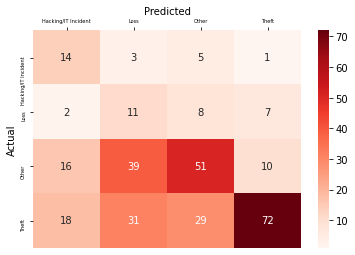

In [ ]:
# Plotting the confusion matrix for Naive Bayes with SMOTE
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, pred1))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### Naive Bayes with RandomOverSampling:

In [ ]:
# Train the model using the Random Oversampling training sets
multi_naive.fit(X_trainRand, Y_trainRand)

#Predict the response for test dataset
pred2 = multi_naive.predict(X_test)

#Printing the classification report for Random Oversampling
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.12      0.39      0.18        28
           2       0.47      0.48      0.48       116
           3       0.75      0.53      0.62       150

    accuracy                           0.46       317
   macro avg       0.34      0.35      0.32       317
weighted avg       0.54      0.46      0.49       317



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


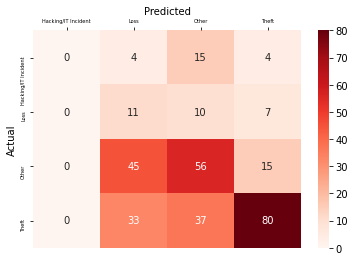

In [ ]:
# Plotting the confusion matrix for Naive Bayes with Random Oversampling
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, pred2))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### Naive Bayes with SMOTE and TOMEK

In [ ]:
# Train the model using the SMOTE+TOMEK Links training sets
multi_naive.fit(X_train_SMT, Y_train_SMT)

#Predict the response for test dataset
pred3 = multi_naive.predict(X_test)

#Printing the classification report for SMOTE+TOMEK Links
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.26      0.70      0.38        23
           1       0.14      0.43      0.21        28
           2       0.53      0.41      0.46       116
           3       0.81      0.45      0.58       150

    accuracy                           0.45       317
   macro avg       0.44      0.49      0.41       317
weighted avg       0.61      0.45      0.49       317



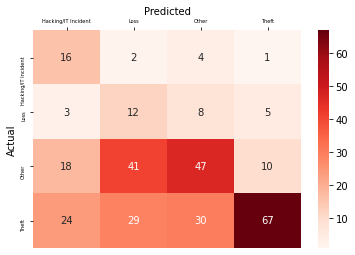

In [ ]:
# Plotting the confusion matrix for Naive Bayes with SMOTE+TOMEK Links
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, pred3))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()



# **K-Means Clustering:**

In [ ]:
#Creating a k-means model with tuned parameters
kmeans = KMeans(n_clusters=4, # number of clusters 
                init='k-means++', # kmeans++ selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
                n_init=100, # The number of times the k-means algorithm will be run with different centroids
                max_iter=300, # This is the maximum number of iterations of the k-means algorithm for a single run
                tol=0.01, # This is the relative tolerance
                precompute_distances=True, # always precompute the distances
                verbose=int, # This is the verbosity mode, it outputs all the iterations
                random_state=None, # Determines random number generation for centroid initialization
                copy_x=True, # Does not modify the original data when computiong the distances (True is the default value)
                n_jobs=None, # Uses uses all processors
                algorithm='auto')# the kmeans algorithm used, auto is used because it takes less memory

### K-means without balancing:

In [ ]:
# Train the model using the training sets
kmeans.fit(X_train, y_train)

#Predict the response for test dataset
kpred = kmeans.predict(X_test)

Initialization complete
Iteration  0, inertia 896.156
Iteration  1, inertia 470.849
Iteration  2, inertia 458.650
Iteration  3, inertia 456.989
Iteration  4, inertia 455.330
Iteration  5, inertia 455.127
Iteration  6, inertia 455.097
Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.713796e-06
Initialization complete
Iteration  0, inertia 953.036
Iteration  1, inertia 470.515
Iteration  2, inertia 455.823
Iteration  3, inertia 454.670
Iteration  4, inertia 454.654
Converged at iteration 4: center shift 0.000000e+00 within tolerance 2.713796e-06
Initialization complete
Iteration  0, inertia 882.501
Iteration  1, inertia 474.144
Iteration  2, inertia 462.350
Iteration  3, inertia 456.793
Iteration  4, inertia 456.749
Converged at iteration 4: center shift 0.000000e+00 within tolerance 2.713796e-06
Initialization complete
Iteration  0, inertia 904.841
Iteration  1, inertia 470.556
Iteration  2, inertia 462.149
Iteration  3, inertia 461.968
Iteration  4, inertia 461.90

In [ ]:
# Printing the classification report for kmeans
print(classification_report(y_test, kpred))

              precision    recall  f1-score   support

           0       0.08      0.52      0.15        23
           1       0.03      0.04      0.03        28
           2       0.11      0.03      0.05       116
           3       0.28      0.19      0.23       150

    accuracy                           0.15       317
   macro avg       0.13      0.20      0.11       317
weighted avg       0.18      0.15      0.14       317



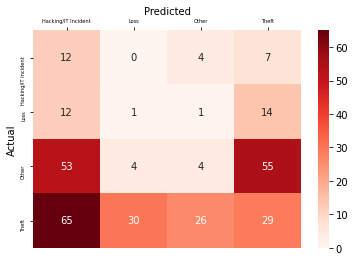

In [ ]:
# Plotting the confusion matrix for kmeans 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, kpred))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### K-means with SMOTE:

In [ ]:
# Train the model using the SMOTE training sets
kmeans.fit(X_train_smote, Y_train_smote)

#Predict the response for test dataset
kpred1 = kmeans.predict(X_test)

Initialization complete
Iteration  0, inertia 1243.113
Iteration  1, inertia 809.161
Iteration  2, inertia 806.150
Iteration  3, inertia 804.668
Iteration  4, inertia 804.509
Converged at iteration 4: center shift 0.000000e+00 within tolerance 2.312114e-06
Initialization complete
Iteration  0, inertia 1325.014
Iteration  1, inertia 815.640
Iteration  2, inertia 814.482
Iteration  3, inertia 814.142
Iteration  4, inertia 813.797
Iteration  5, inertia 812.626
Iteration  6, inertia 811.935
Iteration  7, inertia 811.712
Iteration  8, inertia 811.623
Converged at iteration 8: center shift 0.000000e+00 within tolerance 2.312114e-06
Initialization complete
Iteration  0, inertia 1344.157
Iteration  1, inertia 794.397
Iteration  2, inertia 794.349
Iteration  3, inertia 793.919
Iteration  4, inertia 792.829
Iteration  5, inertia 790.799
Iteration  6, inertia 790.119
Iteration  7, inertia 789.957
Iteration  8, inertia 789.834
Iteration  9, inertia 789.811
Iteration 10, inertia 789.801
Converged a

In [ ]:
# Printing the classification report for K-means with SMOTE
print(classification_report(y_test, kpred1))

              precision    recall  f1-score   support

           0       0.07      0.30      0.11        23
           1       0.03      0.04      0.03        28
           2       0.29      0.06      0.10       116
           3       0.56      0.57      0.57       150

    accuracy                           0.32       317
   macro avg       0.24      0.24      0.20       317
weighted avg       0.38      0.32      0.32       317



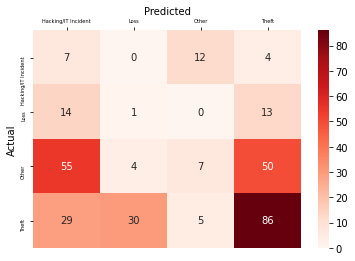

In [ ]:
# Plotting the confusion matrix for kmeans with SMOTE 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, kpred1))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### K-means with RandomOverSampling:

In [ ]:
# Train the model using the Random Oversampling training sets
kmeans.fit(X_trainRand, Y_trainRand)

#Predict the response for test dataset
kpred2 = kmeans.predict(X_test)

Initialization complete
Iteration  0, inertia 1378.530
Iteration  1, inertia 739.201
Iteration  2, inertia 732.490
Iteration  3, inertia 722.296
Iteration  4, inertia 718.338
Iteration  5, inertia 715.435
Iteration  6, inertia 714.487
Iteration  7, inertia 714.464
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.713210e-06
Initialization complete
Iteration  0, inertia 1384.913
Iteration  1, inertia 724.255
Iteration  2, inertia 716.058
Iteration  3, inertia 713.647
Iteration  4, inertia 713.582
Converged at iteration 4: center shift 0.000000e+00 within tolerance 2.713210e-06
Initialization complete
Iteration  0, inertia 1423.424
Iteration  1, inertia 734.035
Iteration  2, inertia 723.974
Iteration  3, inertia 720.415
Iteration  4, inertia 718.712
Iteration  5, inertia 718.536
Iteration  6, inertia 718.527
Converged at iteration 6: center shift 0.000000e+00 within tolerance 2.713210e-06
Initialization complete
Iteration  0, inertia 1433.487
Iteration  1, inertia 73

In [ ]:
# Printing the classification report for K-means with Random Oversampling
print(classification_report(y_test, kpred2))

              precision    recall  f1-score   support

           0       0.09      0.65      0.15        23
           1       0.03      0.04      0.03        28
           2       0.29      0.02      0.03       116
           3       0.27      0.19      0.22       150

    accuracy                           0.15       317
   macro avg       0.17      0.22      0.11       317
weighted avg       0.24      0.15      0.13       317



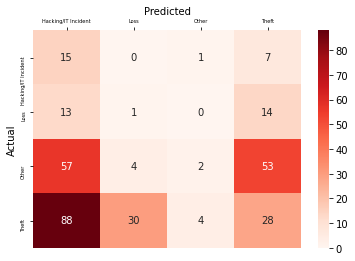

In [ ]:
# Plotting the confusion matrix for kmeans with Random Oversampling 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, kpred2))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### K-means with SMOTE and TOMEK:

In [ ]:
# Train the model using the SMOTE+TOMEK Links training sets
kmeans.fit(X_train_SMT, Y_train_SMT)

#Predict the response for test dataset
kpred3 = kmeans.predict(X_test)

Initialization complete
Iteration  0, inertia 1234.773
Iteration  1, inertia 794.381
Iteration  2, inertia 793.076
Iteration  3, inertia 789.862
Iteration  4, inertia 786.951
Iteration  5, inertia 784.798
Iteration  6, inertia 784.696
Iteration  7, inertia 784.690
Converged at iteration 7: center shift 0.000000e+00 within tolerance 2.295944e-06
Initialization complete
Iteration  0, inertia 1321.608
Iteration  1, inertia 770.359
Iteration  2, inertia 769.817
Iteration  3, inertia 769.421
Iteration  4, inertia 769.142
Iteration  5, inertia 769.077
Iteration  6, inertia 768.988
Iteration  7, inertia 768.434
Iteration  8, inertia 767.906
Iteration  9, inertia 766.414
Iteration 10, inertia 764.795
Iteration 11, inertia 763.624
Iteration 12, inertia 761.451
Iteration 13, inertia 757.625
Iteration 14, inertia 757.005
Iteration 15, inertia 757.000
Converged at iteration 15: center shift 0.000000e+00 within tolerance 2.295944e-06
Initialization complete
Iteration  0, inertia 1259.837
Iteration 

In [ ]:
# Printing the classification report for K-means with SMOTE+TOMEK Links
print(classification_report(y_test, kpred3))

              precision    recall  f1-score   support

           0       0.03      0.17      0.05        23
           1       0.13      0.50      0.21        28
           2       0.29      0.06      0.10       116
           3       0.86      0.20      0.32       150

    accuracy                           0.17       317
   macro avg       0.33      0.23      0.17       317
weighted avg       0.53      0.17      0.21       317



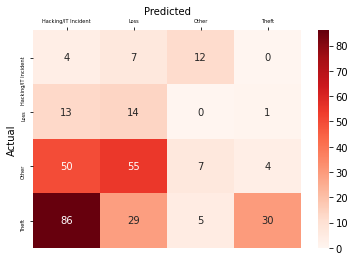

In [ ]:
# Plotting the confusion matrix for kmeans with SMOTE+TOMEK Links
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, kpred3))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

# **Support vector machines (SVMs)**

In [ ]:
# defining the model
Model = svm.SVC()

In [ ]:
# Tunuing the hyperparameters
# C adds a penalty for each misclassified data point, 
# If c is small, the penalty for misclassified points is low so a decision boundary with a 
# large margin is chosen at the expense of a greater number of misclassifications
# Low values of gamma indicates a large similarity radius which results in more points being grouped together.
# Low values of gamma are chosen to avoid overfitting
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1] # the values for C, range from 0.05-1
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] # the values for gamma range from 0.1-1.0
kernel=['Polynomial','Sigmoid','rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=Model,param_grid=hyper,verbose=True)




### SVM without Balancing:

In [ ]:
# Training the model using the training sets
gd.fit(X_train, y_train)

# Predicting the response for test dataset
predictions = gd.predict(X_test)

# Printing the best score after tuning
print(gd.best_score_)

# Printing the best estimator after tuning
print(gd.best_estimator_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Sigmoid' is not in list

  FitFailedWarning)


0.6105862584017924
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   59.9s finished


In [ ]:
#printing the classification report for SVM
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        28
           2       0.54      0.87      0.67       116
           3       0.82      0.72      0.77       150

    accuracy                           0.66       317
   macro avg       0.34      0.40      0.36       317
weighted avg       0.59      0.66      0.61       317



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


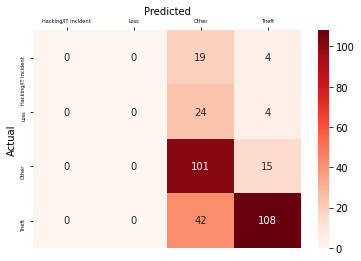

In [ ]:
# Plotting the confusion matrix for SVM 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, predictions))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### SVM with SMOTE:

In [ ]:
# Training the model using the SMOTE training sets
gd.fit(X_train_smote, Y_train_smote)

# Predicting the response for test dataset
predictions1 = gd.predict(X_test)

# Printing the best score
print(gd.best_score_)

# Printing the best estimator
print(gd.best_estimator_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Sigmoid' is not in list

  FitFailedWarning)


0.8593306288032455
SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  2.7min finished


In [ ]:
# Printing the classification report for SVM with SMOTE
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.33      0.04      0.08        23
           1       1.00      0.04      0.07        28
           2       0.55      0.86      0.67       116
           3       0.82      0.71      0.76       150

    accuracy                           0.66       317
   macro avg       0.68      0.41      0.39       317
weighted avg       0.70      0.66      0.62       317



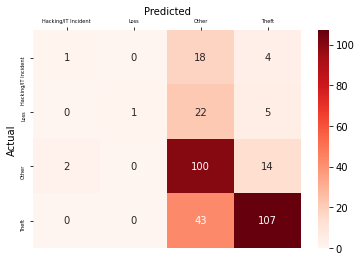

In [ ]:
# Plotting the confusion matrix for SVM with SMOTE
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, predictions1))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### SVM with RnadomOverSampling:

In [ ]:
# Training the model using the Random Oversampling training sets
gd.fit(X_trainRand, Y_trainRand)

# Predicting the response for test dataset
predictions2 = gd.predict(X_test)

# Printing the best score
print(gd.best_score_)

# Printing the best estimator
print(gd.best_estimator_)


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Sigmoid' is not in list

  FitFailedWarning)


0.7993317610062893
SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  1.7min finished


In [ ]:
# Printing the classification report for SVM with Random Oversampling
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.33      0.04      0.06        28
           2       0.55      0.88      0.67       116
           3       0.83      0.70      0.76       150

    accuracy                           0.66       317
   macro avg       0.43      0.40      0.37       317
weighted avg       0.62      0.66      0.61       317



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


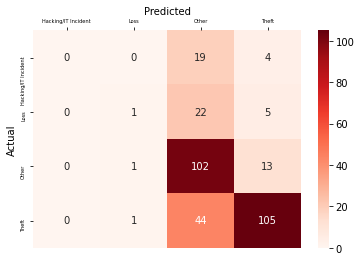

In [ ]:
# Plotting the confusion matrix for SVM with Random Oversampling 
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, predictions2))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()

### SVM with SMOTE and TOMEK:

In [ ]:
# Training the model using the SMOTE+TOMEK Links training sets
gd.fit(X_trainRand, Y_trainRand)

# Predicting the response for test dataset
predictions3 = gd.predict(X_test)

# Printing the best score
print(gd.best_score_)

# Printing the best estimator
print(gd.best_estimator_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Sigmoid' is not in list

  FitFailedWarning)


0.7993317610062893
SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  1.7min finished


In [ ]:
# Printing the classification report for SVM wiht SMOTE+TOMEK Links
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.33      0.04      0.06        28
           2       0.55      0.88      0.67       116
           3       0.83      0.70      0.76       150

    accuracy                           0.66       317
   macro avg       0.43      0.40      0.37       317
weighted avg       0.62      0.66      0.61       317



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


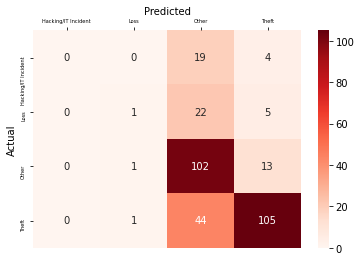

In [ ]:
# Plotting the confusion matrix for SVM with SOMTE+TOMEK Links
ax= plt.subplot()
cF1_matrix=pd.DataFrame(confusion_matrix(y_test, predictions3))
sns.heatmap(cF1_matrix, annot=True, ax = ax, fmt = 'g',cmap="Reds"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=10)
ax.yaxis.set_ticklabels(['Hacking/IT Incident','Loss','Other','Theft'], fontsize = 5)
plt.show()